**Introduction to deep learning and Neural networks**

In this notebook there are various concepts covered like:
* Dense
* fit
* predict
* epoch
* flatten
* activation function
* optimization
* loss
* Early Stopping(in-build and Custom)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Data Creation

In [2]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = (x * 2) - 1
print(x)
print(y)

[-1.  0.  1.  2.  3.  4.]
[-3. -1.  1.  3.  5.  7.]


Initializing and Compiling a Simple Neural Network Model with TensorFlow/Keras

In [3]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=3),
    tf.keras.layers.Dense(units=1),
])
model.compile(optimizer='sgd',loss='mean_squared_error')

Train Model

In [4]:
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 627ms/step - loss: 5.6190
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 2.8561
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.5271
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9560
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7284
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6348
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.5883
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5576
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5323
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5092
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4873
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4664
Epoch 13/100
1/1 [==============================] - 0s 6m

Inference

In [5]:
model.predict(np.array([15.0]),verbose=0)

array([[28.69078]], dtype=float32)

Training Fashion Dataset using tensorflow

In [6]:
fashion_mnst = tf.keras.datasets.fashion_mnist

In [7]:
(train_data,train_label),(test_data,test_label) = fashion_mnst.load_data()

In [8]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Function to display images

In [17]:
def display_images(img):
    plt.figure(figsize=(12, 8))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i])
    plt.show()

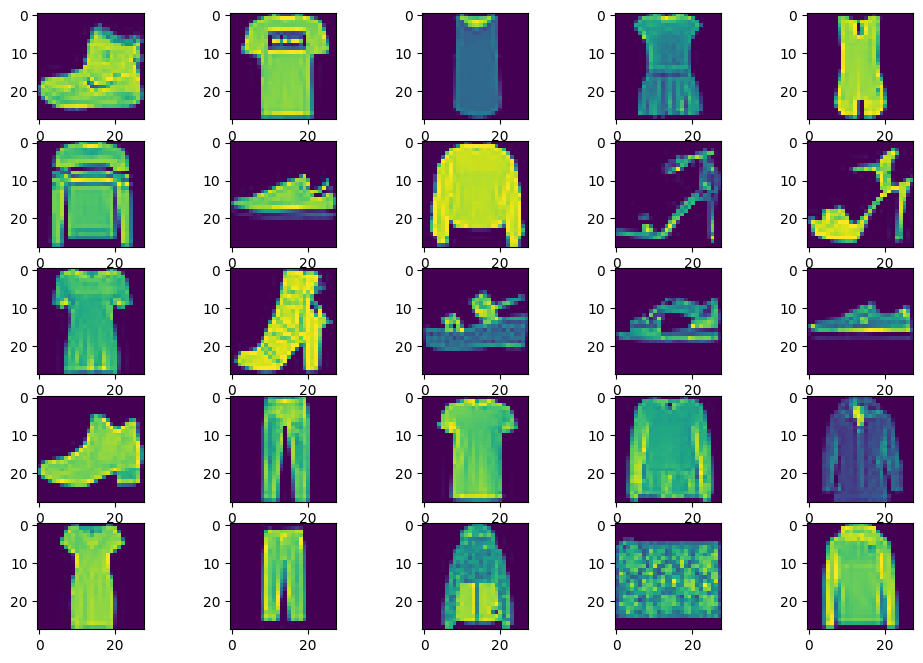

In [18]:
display_images(train_data)

Initialize and Compile model

In [38]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax),
])
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy())

Fit training images data into the model

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',       #Metric to monitor
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,      # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)
model.fit(x=train_data,y=train_label,epochs=100,callbacks=[early_stopping])

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3023
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3023
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3023
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3023


In [44]:
model.predict(test_data)

313/313 [==============================] - 1s 1ms/step


array([[0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       ...,
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333]], dtype=float32)

In [ ]:
model.evaluate?

In [49]:
loss = model.evaluate(test_data,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026


In [50]:
loss

2.302637815475464

In [57]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax),
])
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [73]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.01,patience=3,restore_best_weights=True)
model.fit(train_data,train_label,epochs=100,callbacks=early_stopping)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1911
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1904
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1896
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1884


Custom Callback

In [83]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss'] < 0.3:
            print(f"\nloss is low {logs['loss']},so cancelling training")
            self.model.stop_training = True

In [ ]:
model.fit(train_data,train_label,epochs=100,callbacks=[CustomCallBack()])

Epoch 1/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.1808
loss is low 0.18093590438365936,so cancelling training
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1809
